# Medical Appointment No Shows Data Analysis Project


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> -In this project we'll be analyzing data associated with medical appointments that focused on the question of whether or not patients show up for their appointment, and what are the factors that affects no-show ups for the appointment.
>
>- The dataset is from :https://www.kaggle.com/joniarroba/noshowappointments
>
> <b>Dataset Properties:</b>
>
>> <b>110527 rows</b> , and <b>14 variables</b>
>
>><b>Variables meaning:</b>
>>
>><b>1 - PatientId:</b> Identification of a patient.
>>
>><b>2 - AppointmentID:</b> Identification of each appointment.
>>
>><b>3 - Gender:</b> Male or Female.
>>
>><b>4 - DataMarcacaoConsulta:</b> The day of the actuall appointment, when they have to visit the doctor.
>>
>><b>5 - DataAgendamento:</b> The day someone called or registered the appointment, this is before appointment.
>>
>><b>6 - Age:</b> How old is the patient.
>>
>><b>7 - Neighbourhood:</b> Where the appointment takes place.
>>
>><b>8 - Scholarship:</b> True of False . (scholarship for poor people in Brazil).
>>
>><b>9 - Hipertension:</b> True or False.
>>
>><b>10 - Diabetes:</b> True or False.
>>
>><b>11 - Alcoholism:</b> True or False.
>>
>><b>12 - Handcap:</b> True or False.
>>
>><b>13 - SMS_received:</b> 1 or more messages sent to the patient.
>>
>><b>14 - No-show:</b> True or False.


> -<b>As we have a dataset first so we are going to ask questions based on it</b>.
>
> -<b>Questions</b>:
>><b>Questions we are going to answer at the end:</b>
>>>1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>>>
>>>2- does the neighborhood is an important factor that make the patient doesnot show up?
>>>
>>>
>>>3-The waiting time of the patient between the schedule day and the appointment day influences it's no showing?
>>>
>>>4- did the people who recive the sms show up more than those who are not?


>> <b>Questions to thought abbout?</b>
>>>
>>>5-does the patients with scholarships show up more than those who are not? 
>>>
>>>6- does the gender affects the showing up to the appointment?
>>


> -<b>One dependent variable</b> 
>
>>-No_show
>
> -<b>13 independent variables</b>
>> 
>>the rest of the variables are independed

In [815]:
#importing needed packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

>Here we are going to do 2 steps:
>>1- <b>Assessing Data:</b> exploring data and giving comments over all the weired, wrong, and missing values in the data.
>>
>>2- <b>Cleaning data:</b> clean the data by using the comments we wrote.

### 1 - Assessing Data

In [816]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv") #read data
df.sample(5) # explore data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
50364,2.642797e+13,5719661,F,2016-05-19T11:45:47Z,2016-05-25T00:00:00Z,59,SANTA CLARA,0,1,0,0,0,1,No
87558,7.329589e+13,5707027,F,2016-05-17T09:05:45Z,2016-06-02T00:00:00Z,28,JABOUR,0,0,0,0,0,0,No
82295,2.681515e+11,5702439,M,2016-05-16T12:22:16Z,2016-05-16T00:00:00Z,59,ITARARÉ,0,1,0,1,0,0,No
73442,3.681273e+13,5640470,M,2016-04-29T10:46:49Z,2016-05-20T00:00:00Z,4,SANTOS REIS,0,0,0,0,0,0,No
12365,4.481140e+12,5749521,M,2016-05-31T07:54:48Z,2016-05-31T00:00:00Z,50,ILHA DO PRÍNCIPE,0,1,0,1,0,0,No


In [817]:
df.shape

(110527, 14)

> <b>Comments:</b>
>
> -We can drop the indepentent variable like <b>AppointmentID</b> as it is not affecting the dependent variable <b>No-show</b> in predicting whether or not the patient is going to show up.
>
> -<b>AppointmentDay</b> has <b>00:00:00</b> in its <b>TimeStamp</b> we will <b>remove</b> it.
>
> -in <b>ScheduledDay</b>, as we are going to remove the time from the <b>AppointmentDay</b> column we will do that here too. the time in schedule day is not important as if the time were assigned in appointment day.
>
> -There is misspelling in columns names like : <b>Hipertension</b>, the correct name should be <b>Hypertension</b>.
>
> -There is misspelling in columns names like : <b>Handcap</b>, the correct name should be <b>Handicap</b>.
>
> -Changing column <b>SMS_received</b> name to <b>SMSReceived</b> whould be better.
>
> -Changing column <b>No-show</b> name to <b>NoShow</b> whould be better.
>
> -An important thing about <b>No-show</b> column values, that <b>Yes</b> means that the patient didn't show at the appointment.
> -Calculating the <b>WaitingTime</b> between the <b>ScheduledDay</b> and <b>AppointmentDay</b>, and setting the result in a new column with <b>WaitingTime</b> name. it could be useful.
--------------------------------------------------------------------------------------------------------

In [818]:
#check missing values
#check minimum and maximium values and mean of some columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> <b>Comments:</b>
>
> -We can see that <b>Age</b> minimium value is <b>-1</b> and the maximum value is <b>115</b> ! that range indicates that there is an <b>outlaiers</b> in that column.
>
> -Also from here we can check for the <b>missing values</b> from count row. and the count row showes that there is <b>no missing values</b>.
--------------------------------------------------------------------------------------------------------

In [819]:
# check missing values 
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> <b>Comments:</b>
>
> -We can see that there is <b>no missing values</b> in this dataset.
>
> -<b>PatientId</b> is a <b>float64 datatype</b>, it is better to parsing it to <b>int64 datatype</b>.
>
> -<b>AppointmentDay</b> is an <b>object datatype</b>, it is better to parsing it to <b>DateTime datatype</b>.
>
> -<b>ScheduledDay</b> is an <b>object datatype</b>, it is better to parsing it to <b>DateTime datatype</b>.
>
> -<b>No-show</b> coulmn have to be changed from <b>yes-no</b> to <b>1-0</b> in a new column for better further use, with <b>int64 datatype</b>.
--------------------------------------------------------------------------------------------------------

In [820]:
#check for duplicates
sum(df.duplicated())

0

> <b>Comment:</b>
>
> -No <b>duplicated rows</b> in the dataset.
--------------------------------------------------------------------------------------------------------

In [821]:
#check for the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [822]:
#check the unique values of ScheduledDay
df["ScheduledDay"].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [823]:
#check the unique values of AppointmentDay
df["AppointmentDay"].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

> <b>Comment:</b>
>
> -the number of the unique values in <b>ScheduledDay</b> is more than the number of the unique values in <b>AppointmentDay</b>, as the time is not assigned in the <b>AppointmentDay</b>.
--------------------------------------------------------------------------------------------------------

### 2 - Cleaning Data

Data that we are going to clean :
    
> -Dropping the indepentent variables <b>PatientId</b> and <b>AppointmentID</b>.
>
> -Removing time from <b>AppointmentDay</b>.
>
> -Removing time from <b>ScheduledDay</b>.
>
> -Correcting column <b>Hipertension</b> name to <b>Hypertension</b>.
>
> -Correcting column <b>Handcap</b> name to <b>Handicap</b>.
>
> -Changing column <b>SMS_received</b> name to <b>SMSReceived</b>.
>
> -Changing column <b>No-show</b> name to <b>NoShow</b>.
>
> -<b>PatientId</b> is a <b>float64 datatype</b>, it is better to parsing it to <b>int64 datatype</b>.
>
> -Parsing <b>AppointmentDay</b> <b>object datatype</b> to <b>DateTime datatype</b>.
>
> -Parsing <b>ScheduledDay</b> <b>object datatype</b> to <b>DateTime datatype</b>.
>
> -<b>No-show</b> coulmn have to be encoded from <b>yes-no</b> to <b>1-0</b> for better further use.
>
> -Calculate WaitingTime between the <b>AppointmentDay</b> and the <b>ScheduledDay</b> and save the results in a new column with name <b>WaitingTime</b>.
>
> -Adding new column for making the values of the <b>WaitingTime</b> column be categorical, and save the results in a column with name <b>WaitingTimeGroup</b>.
-------------------------------------------------------------------------------------------------------------------

In [824]:
#Dropping the indepentent variable AppointmentID.
cleaned_df = df.drop(columns=['AppointmentID'])

#Removing time from AppointmentDay.
cleaned_df["AppointmentDay"] = cleaned_df["AppointmentDay"].apply(lambda x : x[0:10])

#Removing time from ScheduledDay.
cleaned_df["ScheduledDay"] = cleaned_df["ScheduledDay"].apply(lambda x : x[0:10])

#Correcting columns name: Hipertension to Hypertension, Handcap to Handicap, SMS_received to SMSReceived, No-show to NoShow.
cleaned_df = cleaned_df.rename(columns = {"Hipertension": "Hypertension", "Handcap": "Handicap","SMS_received": "SMSReceived","No-show": "NoShow" })

#Parsing AppointmentDay object datatype to DateTime datatype. 
cleaned_df['AppointmentDay']= pd.to_datetime(cleaned_df['AppointmentDay'])

#Parsing ScheduledDay object datatype to DateTime datatype. 
cleaned_df['ScheduledDay']= pd.to_datetime(cleaned_df['ScheduledDay']) 

#Parsing PatientId datatype to int64 datatype. 
cleaned_df['PatientId']= cleaned_df['PatientId'].astype(np.int64)

#No-show coulmn have to be encoded from yes-no to 1-0 for better further use.
cleaned_df['NoShowTarget'] = cleaned_df['NoShow'].map({'Yes':1,'No':0}) # converting the data from categorical into intgers

In [825]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null object
NoShowTarget      110527 non-null int64
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [826]:
cleaned_df.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShowTarget
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


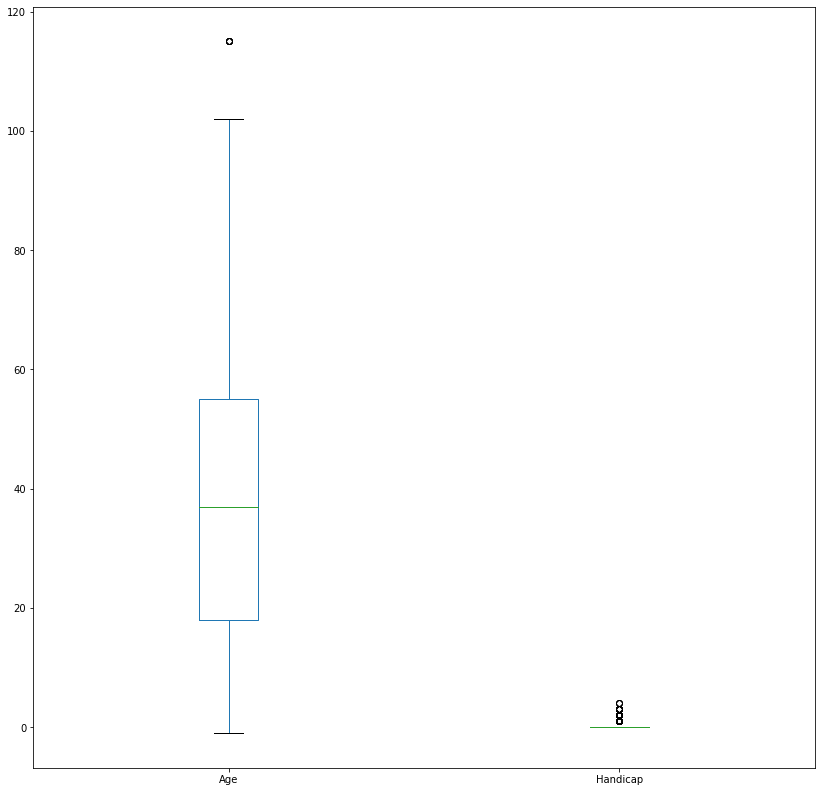

In [827]:
cols = np.r_[4:5,10:11]
cleaned_df.iloc[:, cols].plot(figsize=(14,14),kind='box')

> <b>Comments:</b>
>
> to check the changes, and it seemes that every thing is okay now.
>
>let us handeling the outlaiers in tha <b>Age</b> column. we have to check those outlaiers may be there something in common between them.
-------------------------------------------------------------------------------------------------------------------------

In [828]:
np.sort(cleaned_df["Age"].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

> <b>Comment:</b>
>
> Check the records of the -1 and 0 <b>Age</b> values.
-----------------------------------------------------------------------------------------------------------------

In [829]:
print("Number of patients that their age is assigned with -1 : ",cleaned_df[cleaned_df["Age"]==-1].shape[0])
print("Number of patients that their age is assigned with 0 : ",cleaned_df[cleaned_df["Age"]==0].shape[0])

Number of patients that their age is assigned with -1 :  1
Number of patients that their age is assigned with 0 :  3539


> <b>Comment</b>
>
>that -1 one record, is more likely a mistake while entering data, and it will not affect any thing id we remove that row.
---------------------------------------------------------------------------------------------------------------------------

In [830]:
cleaned_df = cleaned_df[cleaned_df["Age"] >= 0]

In [831]:
cleaned_df.shape

(110526, 14)

>  <b>Comment:</b>
>
>and the patients with <b>Age</b> equals to zero ia more likely babies, but we have to check about that with other attributes like <b>Alcoholism</b>, <b>Diabetes</b>, <b>Hypertension</b>.
--------------------------------------------------------------------------------------------------------------

In [832]:
age_zero_df = cleaned_df[cleaned_df["Age"]==0]

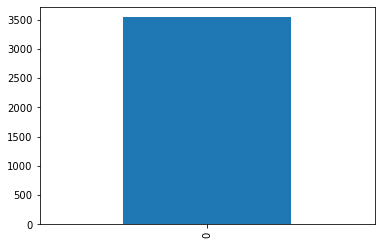

In [833]:
age_zero_df["Alcoholism"].value_counts().plot(kind='bar')

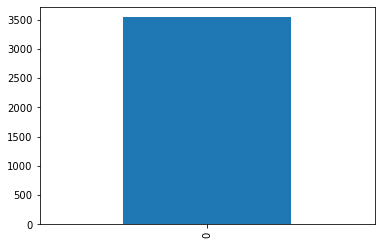

In [834]:
age_zero_df["Diabetes"].value_counts().plot(kind='bar')

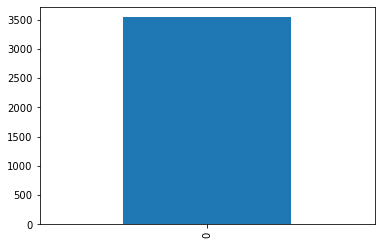

In [835]:
age_zero_df["Hypertension"].value_counts().plot(kind='bar');

> <b>Comment:</b>
>
> Our suspection was right!, the patients who were assigned with <b>Age</b> equals to zero are baby ones. the above 3 graphs gives a strong indication that they are babies.
----------------------------------------------------------------------------------------------------------------

In [836]:
#to calculate the waiting time between any 2 dates, the first date must be ahead the second date.
def calculate_date_difference (first_date, second_date):
    return first_date - second_date

In [837]:
cleaned_df['WaitingTime'] = calculate_date_difference(cleaned_df['AppointmentDay'],cleaned_df['ScheduledDay'])

In [838]:
df_show_up = cleaned_df.NoShowTarget == 0
df_no_show_up = cleaned_df.NoShowTarget == 1

In [839]:
print("patients that showed up mean: ",cleaned_df.Age[df_show_up].mean())
print("patients that did not show up mean: ",cleaned_df.Age[df_no_show_up].mean())

patients that showed up mean:  37.790504154999034
patients that did not show up mean:  34.31766656212196


----------------------------------------------------------------

##### the schedule day must be ahead the appointment day or at least at the same day , but canot be vise versa. so we want to check that all the appointmentsDay values are ahead the scheduledDay values.

In [840]:

check_ahead_dates = cleaned_df['AppointmentDay'] >= cleaned_df['ScheduledDay']

In [841]:
check_ahead_dates.shape

(110526,)

In [842]:
cleaned_df.shape

(110526, 15)

> <b>Comments:</b>
>
> -Calculating the waiting time between the <b>AppointmentDay</b> and the <b>ScheduledDay</b> day and saving the results in a new column named <b>WaitingTime</b>. to see whether or not the <b>WaitingTime</b> affects if the patient show up or not for the appointment.
>
> -And printing the mean of the two categories.
>
> -No wrong assigned <b>ScheduledDay</b> aheads <b>AppointmentDay</b> Dates.
--------------------------------------------------------------------------------------------------------------

##### let's use the waiting time in create categorical waiting time group column to use it in more analysis with the noshow attribute, to get more insights if the longer the waiting time is , the more chance the patient donot show up or not.

In [843]:
cleaned_df['WaitingTimeGroup']=""
cleaned_df["WaitingTimeGroup"][cleaned_df["WaitingTime"]<= timedelta(20)] = "20 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime']<=timedelta(40)) & (cleaned_df["WaitingTime"]>timedelta(20))] ="40 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime']<=timedelta(60)) & (cleaned_df["WaitingTime"]>timedelta(40)) ]="60 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime'] <=timedelta(80)) & (cleaned_df["WaitingTime"]>timedelta(60)) ]="80 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime'] <=timedelta(100)) & (cleaned_df["WaitingTime"]>timedelta(80)) ]="100 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime'] <=timedelta(120)) & (cleaned_df["WaitingTime"]>timedelta(100) )]="120 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime'] <=timedelta(140)) & (cleaned_df["WaitingTime"]>timedelta(120)) ]="140 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime'] <=timedelta(160)) & (cleaned_df["WaitingTime"]>timedelta(140)) ]="160 days"
cleaned_df['WaitingTimeGroup'][(cleaned_df['WaitingTime'] <=timedelta(180)) & (cleaned_df["WaitingTime"]>timedelta(160)) ]="180 days"

G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afte

<a id='eda'></a>
## Exploratory Data Analysis

>let us asking the questions again here :
>>1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>>
>>2- does the neighborhood is an important factor that make the patient doesnot show up?
>>
>>3-The waiting time of the patient between the schedule day and the appointment day influences it's no showing?

> we are goining to :
>> analyse our cleaned data
>> found relashionships between variables
>> giving assumptions
>> answering Questions


#### let's printing the first rows of our cleaned data , and see more properties of it after cleaninig.

In [844]:
cleaned_df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,NoShowTarget,WaitingTime,WaitingTimeGroup
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days,20 days
1,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days,20 days
2,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days,20 days
3,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days,20 days
4,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days,20 days


In [845]:
cleaned_df.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShowTarget,WaitingTime
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,10 days 04:24:39.789370
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15 days 06:07:14.979140
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15 days 00:00:00
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179 days 00:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194A3653A88>,
      dtype=object)

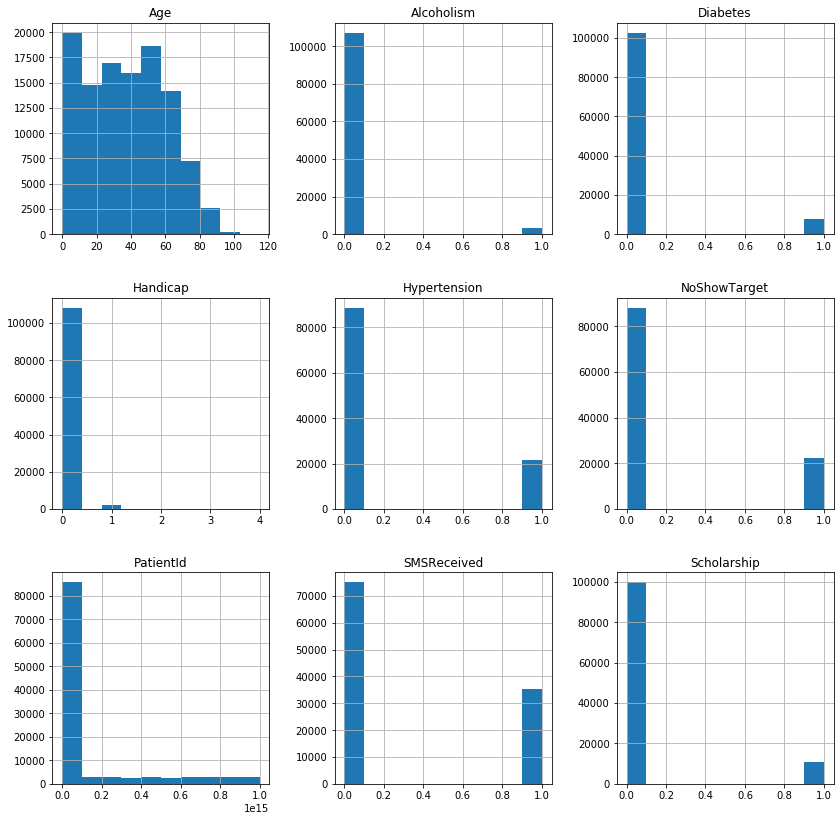

In [846]:
cleaned_df.hist(figsize=(14,14))

> we can get from here that most of patients are :
>> their age is under 70 
>> not have alcoholism/diabetes/hypertension issues
>> are not handicaps
>> showed-up for their appointments
>> didnot recive appointment sms
>> do not belongs to the provided scholarship from Brazel.
>
>we got also from the graph that the age is the only variable that have better distribution than the other variables. we can analyse that variable.

>we are going to see each variable one by one , and then get relations between them.

### 1-Age

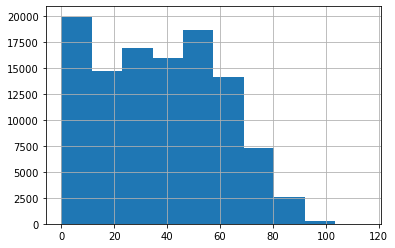

In [847]:
cleaned_df['Age'].hist()

> <b>Comments:</b>
>
> -the distribution is right skewed a little bit.

##### Let's see the relation between ages and no showup patients for their appointmnets.

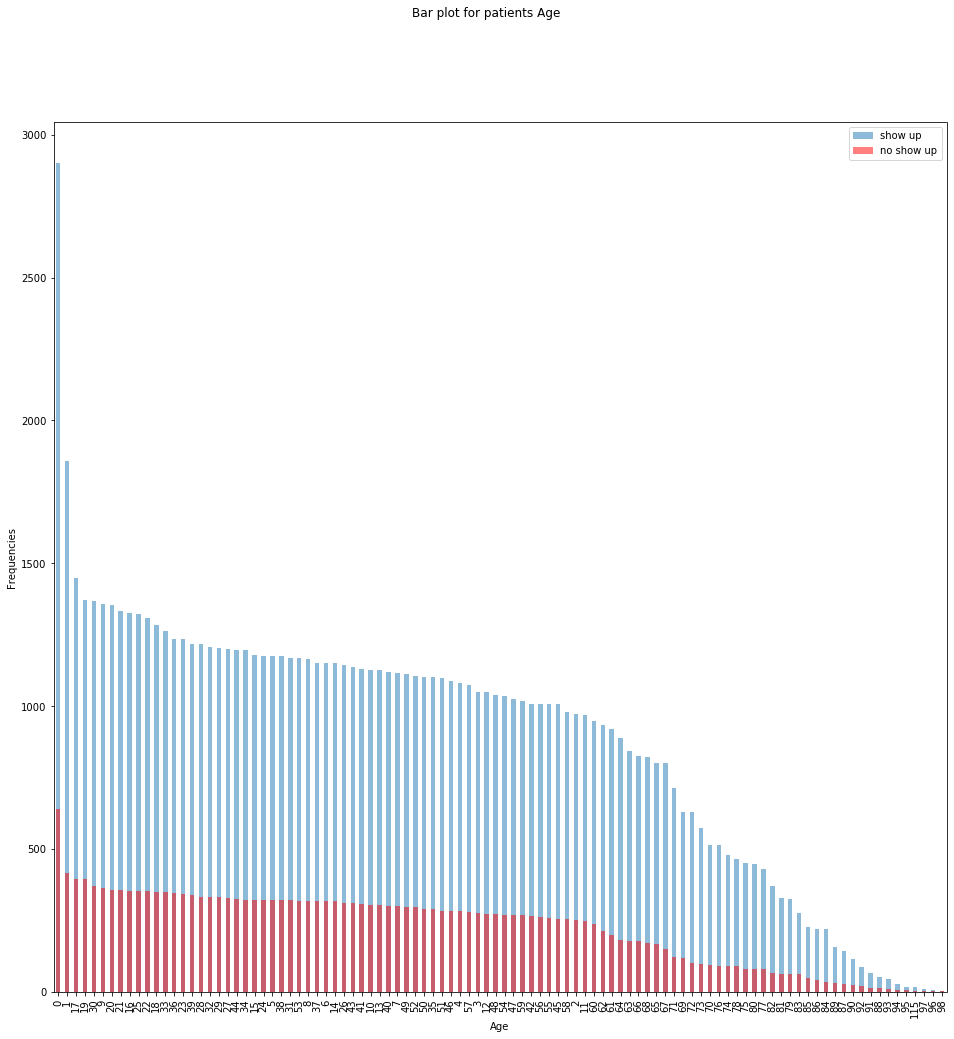

In [848]:
cleaned_df.Age[df_show_up].value_counts().plot(label="show up",alpha=0.5, kind='bar',figsize=(14,14))
cleaned_df.Age[df_no_show_up].value_counts().plot(label="no show up",alpha=0.5,kind='bar',figsize=(16,16),color="red")
plt.suptitle('Bar plot for patients Age')
plt.xlabel('Age')
plt.ylabel('Frequencies')
plt.legend();

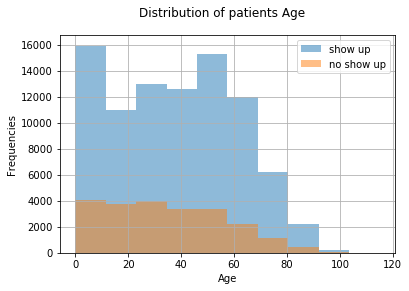

In [849]:
cleaned_df.Age[df_show_up].hist(label="show up",alpha=0.5)
cleaned_df.Age[df_no_show_up].hist(label="no show up",alpha=0.5)
plt.suptitle('Distribution of patients Age')
plt.xlabel('Age')
plt.ylabel('Frequencies')
plt.legend();


> <b>Comments:</b>
>
> -it seems that as much the ages get higher is not an indication for not showing up. but it might give a good relevance if it mixed with another variable.
>
> -a small portion of patients that did not showup are above 70
>
> -the most patients that did not shpw up are in an very small age, it can indicates that maybe their parents have difficulities to bring the child. 
>
> -the distribution is right skewed a little bit.

### 2-Patient ID

In [850]:
cleaned_df["PatientId"].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
                   ..
2886912523138       1
68129842443312      1
99264711372         1
2212945531847       1
57863365759569      1
Name: PatientId, Length: 62298, dtype: int64

> <b>Comments:</b>
>
> we found that there are patients have regiestered for more than one appointment , that means they are frequently come to that hospital for different appointments, or they may have rescudle their appointment.

### 3-SMSReceived

Text(0, 0.5, 'Frequency')

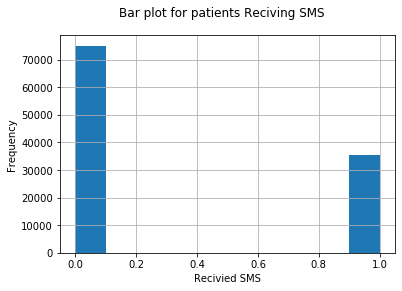

In [851]:
cleaned_df['SMSReceived'].hist()
plt.suptitle('Bar plot for patients Reciving SMS')
plt.xlabel('Recivied SMS')
plt.ylabel('Frequency')

#### Let's see the relation between SMSRecived and no showup patients for their appointmnets

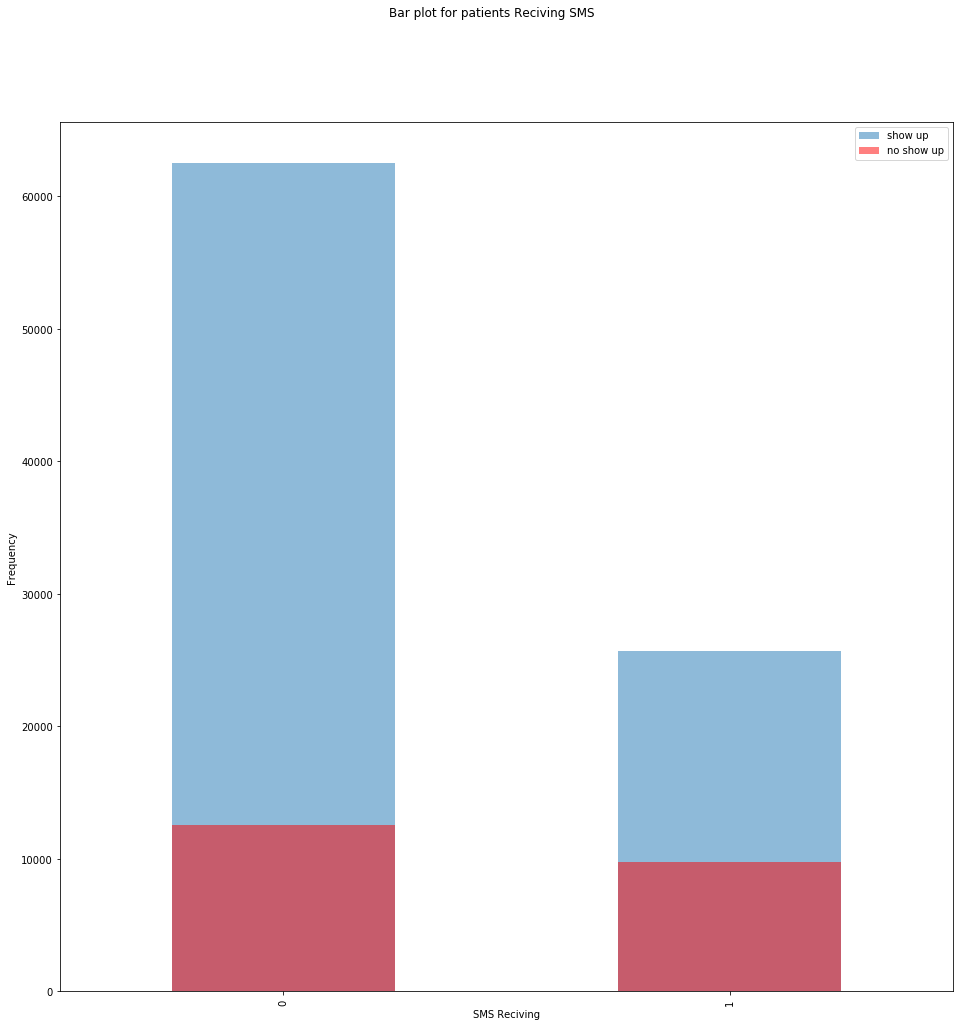

In [852]:
cleaned_df.SMSReceived[df_show_up].value_counts().plot(label="show up",alpha=0.5, kind='bar',figsize=(14,14))
cleaned_df.SMSReceived[df_no_show_up].value_counts().plot(label="no show up",alpha=0.5,kind='bar',figsize=(16,16),color="red")
plt.suptitle('Bar plot for patients Reciving SMS')
plt.xlabel('SMS Reciving')
plt.ylabel('Frequency')
plt.legend();

> <b>Comments:</b>
>
> the most of people did not recive messages, However the number of patients that showed up (in both cases whether they recive messages or not) is high, that indicates that reciving messages doesnot affect the showup for the appointments. 

### 4-Neighbourhood

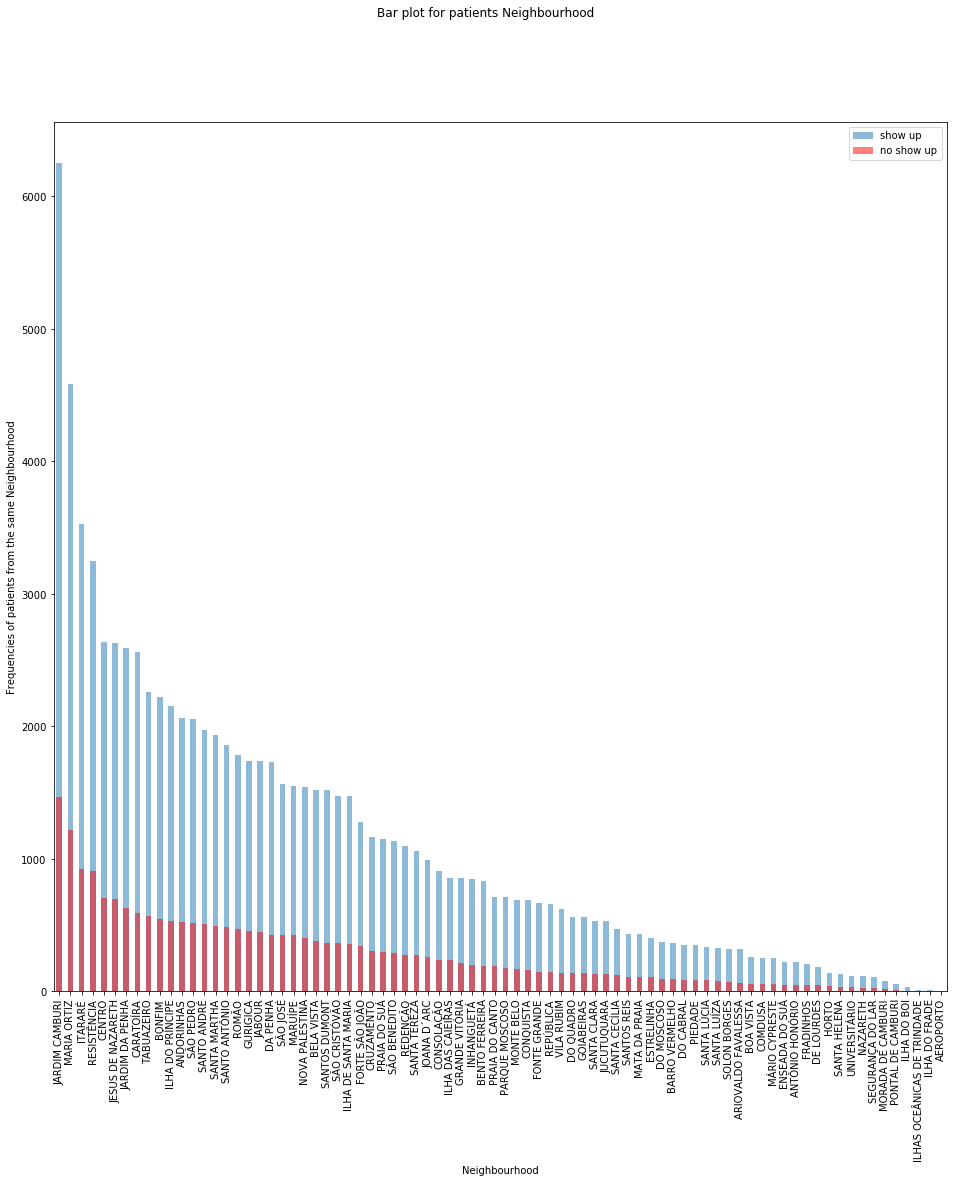

In [853]:
cleaned_df.Neighbourhood[df_show_up].value_counts().plot(label="show up",alpha=0.5, kind='bar',figsize=(14,14))
cleaned_df.Neighbourhood[df_no_show_up].value_counts().plot(label="no show up",alpha=0.5,kind='bar',figsize=(16,16),color="red")
plt.suptitle('Bar plot for patients Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequencies of patients from the same Neighbourhood')
plt.legend();

> <b>Comments:</b>
>
> it gives an indication that the neighbourhood does affect the  chance of showup for the appointments with a significant insight. it might gives more information if we mixed this variable up with another one. 
'JARDEIM CAMBURI' seems to be in a very vital place in the city so the chances for showing up in the hospital in this place is very high.

### 5-WaitingTime

Text(0, 0.5, 'Frequency')

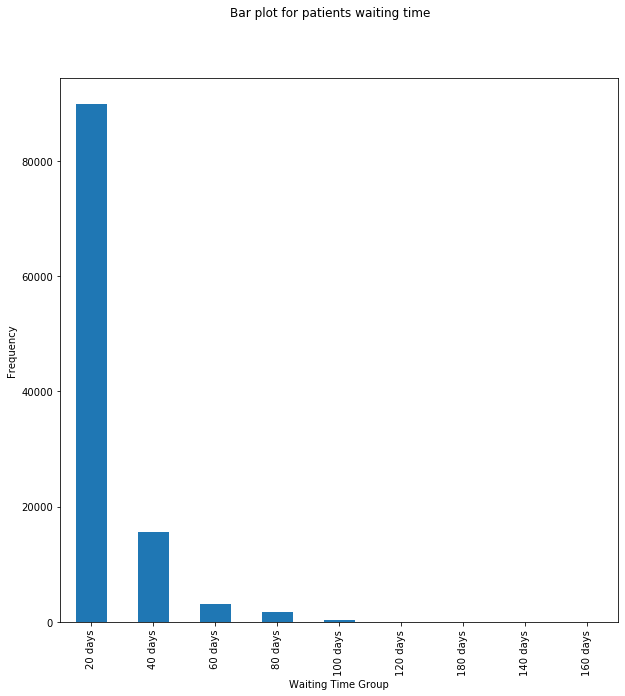

In [854]:
cleaned_df["WaitingTimeGroup"].value_counts().plot(kind="bar",figsize=(10,10))
plt.suptitle('Bar plot for patients waiting time')
plt.xlabel('Waiting Time Group')
plt.ylabel('Frequency')

> <b>Comments:</b>
>
>that indicates that the most of the appointments takesplace within 20 days.

#### let us check the relation ship between the new column WaitingTimeGroup and the NoShow attribute.

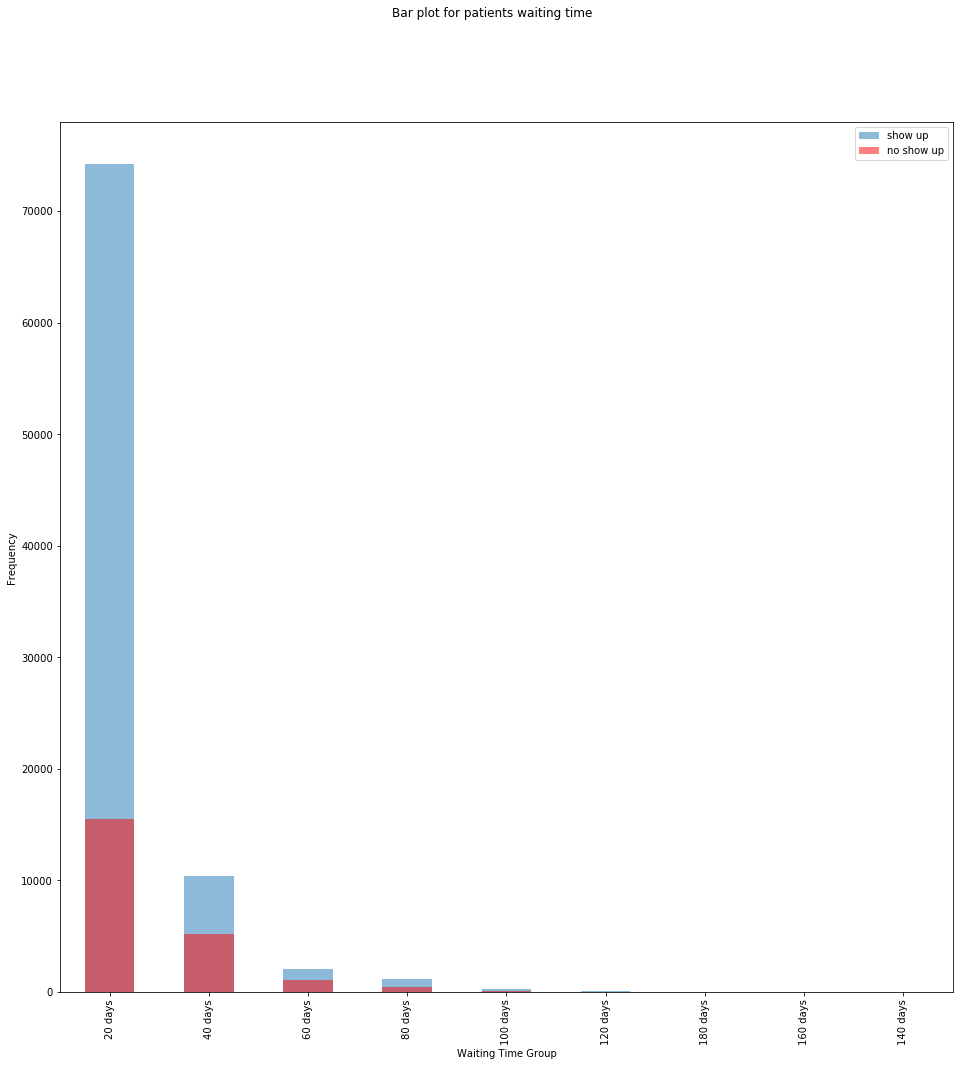

In [855]:
cleaned_df.WaitingTimeGroup[df_show_up].value_counts().plot(label="show up",alpha=0.5, kind='bar',figsize=(14,14))
cleaned_df.WaitingTimeGroup[df_no_show_up].value_counts().plot(label="no show up",alpha=0.5,kind='bar',figsize=(16,16),color="red")
plt.suptitle('Bar plot for patients waiting time')
plt.xlabel('Waiting Time Group')
plt.ylabel('Frequency')
plt.legend();

> <b>Comments:</b>
>
>that gives a strong indication that as long the waiting time increases the showing up for the appoientments decreases.

### 6-NoShow

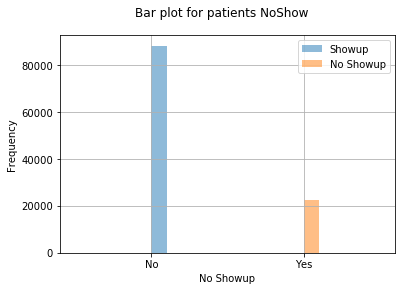

In [856]:
cleaned_df.NoShow[df_show_up].hist(label='Showup', alpha=0.5 )
cleaned_df.NoShow[df_no_show_up].hist(label='No Showup',alpha=0.5 )
plt.suptitle('Bar plot for patients NoShow')
plt.xlabel('No Showup')
plt.ylabel('Frequency')
plt.legend();

#no means that the patient showed up.
#yes means taht the patient didnt show up.

> <b>Comments:</b>
>
> it seems that people that show up more than the people that does not show up.
>
> About 30% of patients didn't show up.
>
> this dataset is not balanced.

### Answering Questions

#### Questions:
>>1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>>
>>2- does the neighborhood is an important factor that make the patient doesnot show up?
>>
>>3-The waiting time of the patient between the schedule day and the appointment day influences it's no showing?

### 1-What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


>-Alot of the insights here that have relevance that may influences no showup for their appointment if we mixed these variables up.
>
>-Variables that have relevance that may influences that patient not showing up:
>>    -Age
>>
>>    -Waiting days
>>
>>    -Neighbourhood
>>
>>    -PatientsID: get patients who registered more than one time (reschedule).
>>
> the rest of looks like have little influences in making patients showing up.

### 2-Does the neighborhood is an important factor that make the patient doesnot show up?

>Yes, it is an important. we found that there are hospitals in vital places the number of patients that showed up for their appointments more than other hospitals with a great portion. and that indicates that the place of the hospital influences the showing up for the appoinmtments. 

### 3- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?

>Yes!, we found that the most of patients that showed up for their appointments their waiting time between the scheduled day and appointment day is between 0-20 days with a ratio more than the patients that showed up for their appointments and their waiting time between 20-40 days and 40-60 days. that gives an indication that as log the waiting time increases the chance that the patient doesn't show up increases. 

### 4- Did the people who recive the sms show up more than those who are not? 

>-No, we found that the number of patients that showed up and didnt recive sms is higher than the number of patients that recived sms and showed up!, that means that the sms are not a storng factor we can work on while predicting the noshowup for the appointment.

<a id='conclusions'></a>
## Conclusions

this analysis is performed on medical appointment no shows, 

About 30% from the patients have not attended to their appointemnets.

the purpose of this analysis is to go deeper why patients dont show up for their appointment. And what are the main factors that affects the no show up chances. 

their are few issues with the dataset like negative values or outlaiers.

-most of the variables are categorical or binary valued , that meaks us can't analysis more variables distribution and the relationships between each other and if we be able to create a predictive model by logistic regression or any other classifiers.

>Age
>>
>>the noshow up chances increasing as older the person is.
>>
>>-most of the showed up patients was babies/and childes
>>
>>and we thought that the baby/child patients that didn't show up, their parents might faced some difficulities in bringing the baby or child. to the appointment. and that might makes the rate of not showing up increases.


>PatientId
>>there many patients have reschedule their appointments, they may have missed their appointments and attend in the rescudule appointment.

>SMSRecived
>>reciving messages doesnot affect the showup for the appointments. the number of patients who showed up and didnt recived any sms are much higher the number of patients who recive messages and showed up. it is not a good factor we can buld assumptions on.

>Neighbourhood
>>Neighbourhood affecte the chances that makes the patients show up , there is vital places in the city that chances for showing up in the hospital in this place is very high.

>Waiting time 
>> by increasing the waiting time, the showing up chances for the appointment decreases. 

>NoShow
>>the patients that show up more than the patients that does not show up.

So we can say that <b>Age</b> and <b>Neighbourhood</b> and <b>WaitingTime</b> are the most important factors that affects the chances the patient shows up or not .



## Limitations

-some variables like neighbourhood would be very useful if we have the addresses of the patients and go deeper whether or not the distance is really an issue for the people who didn't show up. it is an important c=variable but doesnot have many information to go deeper behind

-WaitingTime new variable, its datatype is timedelta, and applying bins to that variable to plot it causes many errors , so i tried to make WaitingTimeGroups manually step by step.it would be better if using bins works.

## References:

https://www.kaggle.com/joniarroba/noshowappointments

https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356

https://www.python-course.eu/pandas_python_binning.php

https://www.pylenin.com/blogs/mastering-python-datetime/

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html

https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib


https://stackoverflow.com/questions/4628122/how-to-construct-a-timedelta-object-from-a-simple-string

https://stackoverflow.com/questions/53699809/binning-pandas-column-of-timestamps

https://stackoverflow.com/questions/43500894/pandas-pd-cut-binning-datetime-column-series

https://dfrieds.com/data-analysis/bin-values-python-pandas.html